## create a dataset where labels are artists
### "print image from kandisky" as request

In [130]:
from os.path import join, dirname
import os
from PIL import Image

training_dir = join(dirname(os.getcwd()),"dataset_art-with-GAN","kaggle")
labels = []

images_dict = {}
i = 0

for artist in os.listdir(training_dir):
    labels.append(artist.lower())
    
    for img in os.listdir(join(training_dir,artist)):
        images_dict[i] ={}
        images_dict[i]["name"] = img
        images_dict[i]["label"] = artist
        i += 1
        
filenames_train  = [el[1]["name"][:-4] for el in image_dict.items()]
filenames_labels = [el[1]["label"] for el in image_dict.items()]


In [131]:
filenames_train[3]

'Amedeo_Modigliani_101'

In [132]:
filenames_labels[3]

'Amedeo_Modigliani'

In [133]:
def get_label(filename):

    for el in image_dict.items(): 
        if el[1]["name"][:-4].lower() == filename.lower():
            return el[1]["label"]
    return "error"

In [150]:
import tensorflow
from tensorflow.keras.applications.resnet50  import preprocess_input 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

class CustomDataset(tensorflow.keras.utils.Sequence):

    def __init__(self, filenames, preprocessing_function=preprocess_input, out_shape=[512,512]):

        self.preprocessing_function = preprocessing_function
        self.out_shape = out_shape
        self.filenames = filenames
        #self.labels = labels

    def __len__(self): return len(self.filenames)

    def __getitem__(self, index):

        # Get Image
        curr_filename = self.filenames[index]
        # Get associated label
        label = get_label(curr_filename)
        # Retrieve image
        path = join(training_dir, label, curr_filename + '.jpg')
        # Convert to RGB
        image_rgb = Image.open(path).convert('RGB')
        # Resize image
        resized_image = image_rgb.resize(self.out_shape)
        # Convert to np array
        image = np.array(resized_image)
       
        return (image, label), 1

In [151]:
train_custom_dataset = CustomDataset( filenames=filenames_train )
#valid_custom_dataset = CustomDataset( filenames=filenames_valid, questions=questions_encoded_valid, answers=answers_valid )

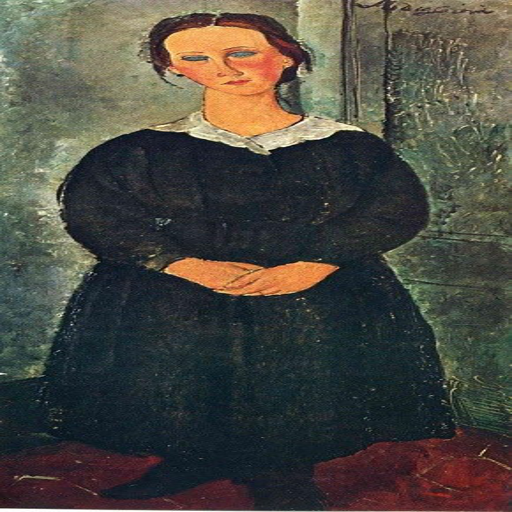

In [152]:
Image.fromarray(train_custom_dataset[0][0][0])

In [153]:
"label: " + str(train_custom_dataset[0][0][1])

'label: Amedeo_Modigliani'

In [154]:
"one: " + str(train_custom_dataset[0][1])

'one: 1'

In [156]:
train_dataset = tf.data.Dataset.from_generator(lambda: train_custom_dataset,
                                               output_types=((tf.uint8,tf.int32), tf.int32),
                                               output_shapes=(([512, 512, 3],(1)), (1)) )
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.repeat()
train_dataset

# valid_dataset = tf.data.Dataset.from_generator(lambda: valid_custom_dataset,
#                                                output_types=((tf.uint8,tf.int32), tf.int32),
#                                                output_shapes=(([img_h, img_w, 3],(max_question_length,)), (58,)) )
# valid_dataset = valid_dataset.batch(32)
# valid_dataset = valid_dataset.repeat()
# valid_dataset

<RepeatDataset shapes: (((None, 512, 512, 3), (None, 1)), (None, 1)), types: ((tf.uint8, tf.int32), tf.int32)>